# 导入数据，理解数据

In [91]:
import pandas as pd
import numpy as np

In [120]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.columns = ['用户ID','性别','老年人','是否有配偶','是否经济独立','客户的职位','是否开通电话服务业务','是否开通了多线业务'
          ,'是否开通互联网服务','是否开通网络安全服务','是否开通在线备份业务','是否开通了设备保护业务','是否开通了技术支持服务'
          ,'是否开通网络电视','是否开通网络电影','签订合同方式','是否开通电子账单','付款方式','月费用','总费用','该用户是否流失']

In [93]:
data.head().T

,0,1,2,3,4
用户ID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
性别,Female,Male,Male,Male,Female
老年人,0,0,0,0,0
是否有配偶,Yes,No,No,No,No
是否经济独立,No,No,No,No,No
客户的职位,1,34,2,45,2
是否开通电话服务业务,No,Yes,Yes,No,Yes
是否开通了多线业务,No phone service,No,No,No phone service,No
是否开通互联网服务,DSL,DSL,DSL,DSL,Fiber optic
是否开通网络安全服务,No,Yes,Yes,Yes,No


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   用户ID         7043 non-null   object 
 1   性别           7043 non-null   object 
 2   老年人          7043 non-null   int64  
 3   是否有配偶        7043 non-null   object 
 4   是否经济独立       7043 non-null   object 
 5   客户的职位        7043 non-null   int64  
 6   是否开通电话服务业务   7043 non-null   object 
 7   是否开通了多线业务    7043 non-null   object 
 8   是否开通互联网服务    7043 non-null   object 
 9   是否开通网络安全服务   7043 non-null   object 
 10  是否开通在线备份业务   7043 non-null   object 
 11  是否开通了设备保护业务  7043 non-null   object 
 12  是否开通了技术支持服务  7043 non-null   object 
 13  是否开通网络电视     7043 non-null   object 
 14  是否开通网络电影     7043 non-null   object 
 15  签订合同方式       7043 non-null   object 
 16  是否开通电子账单     7043 non-null   object 
 17  付款方式         7043 non-null   object 
 18  月费用          7043 non-null   float64
 19  总费用   

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
老年人,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
客户的职位,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
月费用,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# 数据清洗

In [50]:
#查看有无缺失值
data.isnull().mean()

用户ID           0.0
性别             0.0
老年人            0.0
是否有配偶          0.0
是否经济独立         0.0
客户的职位          0.0
是否开通电话服务业务     0.0
是否开通了多线业务      0.0
是否开通互联网服务      0.0
是否开通网络安全服务     0.0
是否开通在线备份业务     0.0
是否开通了设备保护业务    0.0
是否开通了技术支持服务    0.0
是否开通网络电视       0.0
是否开通网络电影       0.0
签订合同方式         0.0
是否开通电子账单       0.0
付款方式           0.0
月费用            0.0
总费用            0.0
该用户是否流失        0.0
dtype: float64

In [51]:
data['该用户是否流失'].value_counts()

No     5174
Yes    1869
Name: 该用户是否流失, dtype: int64

In [121]:
#总费用字段应该为float类型
data['总费用'] = pd.to_numeric(data['总费用'],errors='coerce')

In [108]:
#再次查找缺失值,可以看到总费用有11个缺失值
data.isnull().sum()

用户ID            0
性别              0
老年人             0
是否有配偶           0
是否经济独立          0
客户的职位           0
是否开通电话服务业务      0
是否开通了多线业务       0
是否开通互联网服务       0
是否开通网络安全服务      0
是否开通在线备份业务      0
是否开通了设备保护业务     0
是否开通了技术支持服务     0
是否开通网络电视        0
是否开通网络电影        0
签订合同方式          0
是否开通电子账单        0
付款方式            0
月费用             0
总费用            11
该用户是否流失         0
dtype: int64

In [122]:
#因为数量不多，可以删除这些行
data.dropna(inplace=True)

In [123]:
data.shape

(7032, 21)

# 数据可视化呈现

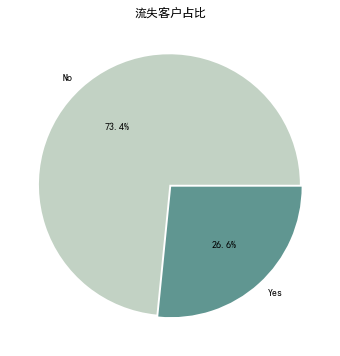

In [56]:
#查看流失客户占比
values = data['该用户是否流失'].value_counts()
label = data['该用户是否流失'].value_counts().index#定义饼图的标签，标签是列表


import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'#设置中文显示
plt.figure(figsize=(6,6))#将画布设定为正方形，则绘制的饼图是正圆
explode=[0.01,0.01]#设定各项距离圆心n个半径
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%',colors=['#C2D2C4','#609691'])#绘制饼图
plt.title('流失客户占比')#绘制标题
plt.show()

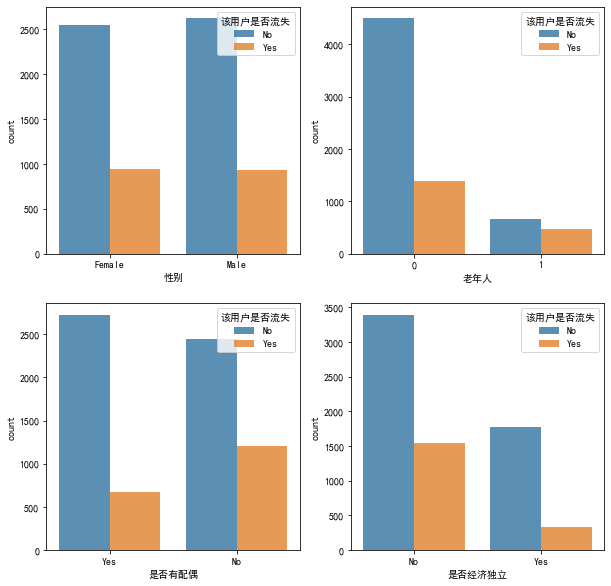

In [57]:
#性别、老年人、是否有配偶、经济是否独立对流客户流失率的影响
import seaborn as sns

label =['性别','老年人','是否有配偶','是否经济独立']
fig , axes = plt.subplots(2,2,figsize=(10,10))

for i in range(len(label)):
    plt.subplot(2,2,i+1)   #subplot(行，列，第几个)
    gender = sns.countplot(x=label[i],hue ='该用户是否流失',data=data,alpha=0.8)
    plt.xlabel(label[i])

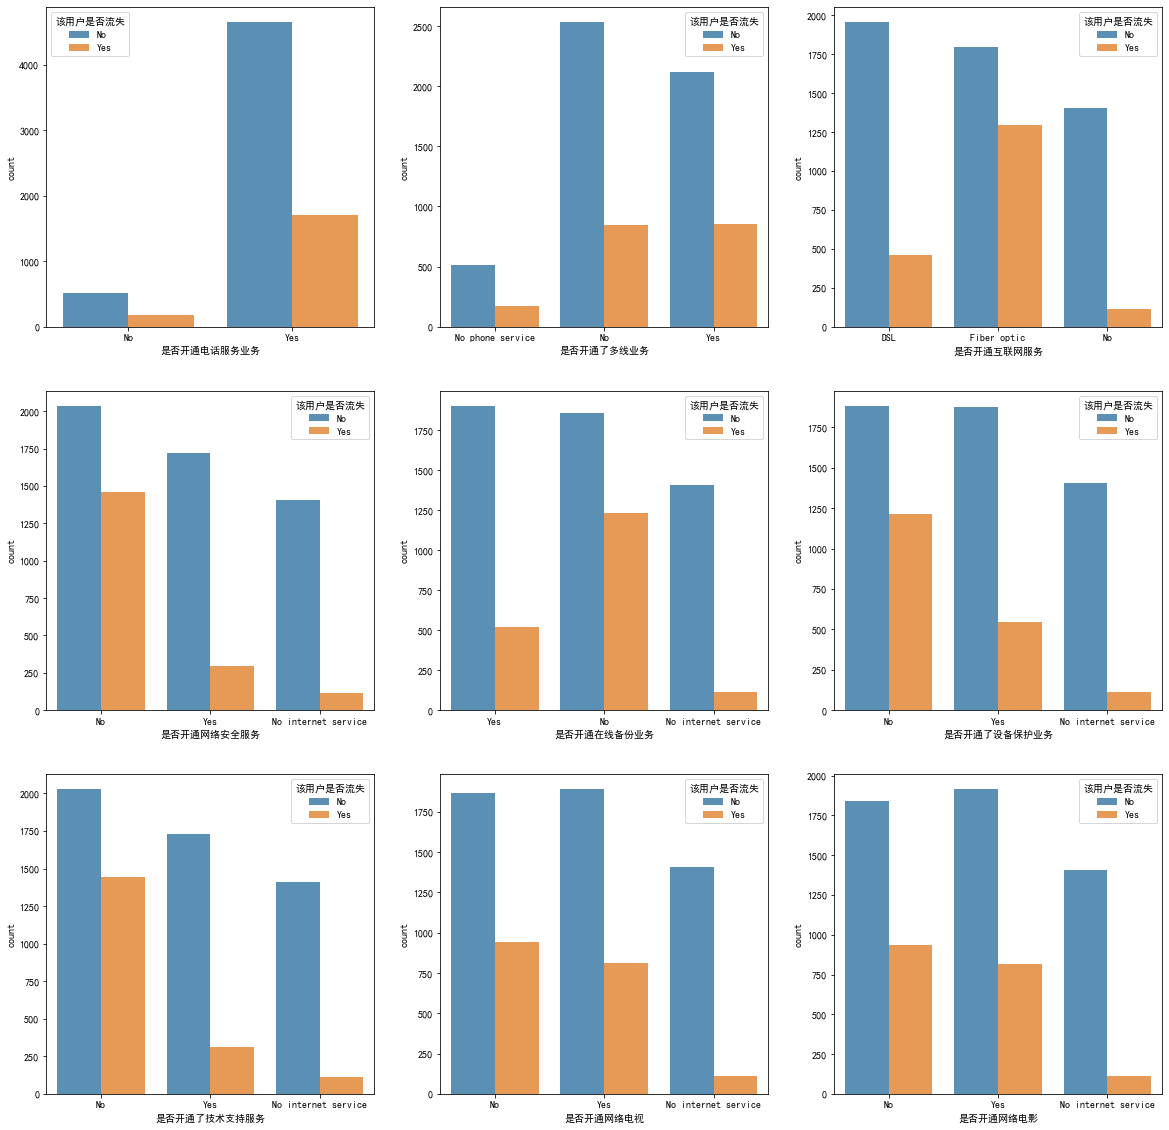

In [58]:
# 网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视、网络电影和无互联网服务对客户流失率的影响
label =['是否开通电话服务业务','是否开通了多线业务','是否开通互联网服务','是否开通网络安全服务','是否开通在线备份业务',
        '是否开通了设备保护业务','是否开通了技术支持服务','是否开通网络电视','是否开通网络电影']
fig , axes = plt.subplots(3,3,figsize=(20,20))

for i in range(len(label)):
    plt.subplot(3,3,i+1)   #subplot(行，列，第几个)
    gender = sns.countplot(x=label[i],hue ='该用户是否流失',data=data,alpha=0.8)
    plt.xlabel(label[i])

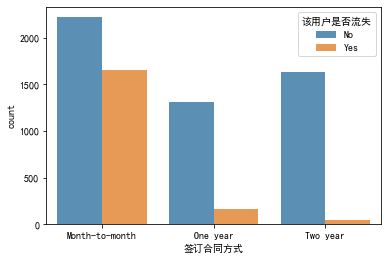

In [59]:
#签订合同方式对客户流失率的影响
sns.countplot(x='签订合同方式',hue ='该用户是否流失',data=data,alpha=0.8)
plt.show()

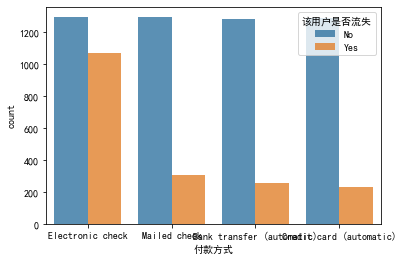

In [60]:
#付款方式对客户流失率的影响
sns.countplot(x='付款方式',hue ='该用户是否流失',data=data,alpha=0.8)
plt.show()

# 数据处理

In [61]:
#查看对象类型字段中存在的值：
def uni(columnlabel):
    print(columnlabel,"--",data[columnlabel].unique())# unique函数去除其中重复的元素，返回唯一值

In [62]:
telcomobject = data.select_dtypes(['object'])
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

用户ID -- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
性别 -- ['Female' 'Male']
是否有配偶 -- ['Yes' 'No']
是否经济独立 -- ['No' 'Yes']
是否开通电话服务业务 -- ['No' 'Yes']
是否开通了多线业务 -- ['No phone service' 'No' 'Yes']
是否开通互联网服务 -- ['DSL' 'Fiber optic' 'No']
是否开通网络安全服务 -- ['No' 'Yes' 'No internet service']
是否开通在线备份业务 -- ['Yes' 'No' 'No internet service']
是否开通了设备保护业务 -- ['No' 'Yes' 'No internet service']
是否开通了技术支持服务 -- ['No' 'Yes' 'No internet service']
是否开通网络电视 -- ['No' 'Yes' 'No internet service']
是否开通网络电影 -- ['No' 'Yes' 'No internet service']
签订合同方式 -- ['Month-to-month' 'One year' 'Two year']
是否开通电子账单 -- ['Yes' 'No']
付款方式 -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
该用户是否流失 -- ['No' 'Yes']


In [124]:
#替换值
data.replace(to_replace='No phone service',value='No',inplace=True)
data.replace(to_replace='No internet service',value='No',inplace=True)

In [64]:
#查看替换成功
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

用户ID -- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
性别 -- ['Female' 'Male']
是否有配偶 -- ['Yes' 'No']
是否经济独立 -- ['No' 'Yes']
是否开通电话服务业务 -- ['No' 'Yes']
是否开通了多线业务 -- ['No' 'Yes']
是否开通互联网服务 -- ['DSL' 'Fiber optic' 'No']
是否开通网络安全服务 -- ['No' 'Yes']
是否开通在线备份业务 -- ['Yes' 'No']
是否开通了设备保护业务 -- ['No' 'Yes']
是否开通了技术支持服务 -- ['No' 'Yes']
是否开通网络电视 -- ['No' 'Yes']
是否开通网络电影 -- ['No' 'Yes']
签订合同方式 -- ['Month-to-month' 'One year' 'Two year']
是否开通电子账单 -- ['Yes' 'No']
付款方式 -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
该用户是否流失 -- ['No' 'Yes']


In [125]:
#用户ID与流失无关，因此可直接删掉
data.drop('用户ID',axis=1,inplace=True)

In [116]:
data.head().T

,0,1,2,3,4
性别,Female,Male,Male,Male,Female
老年人,No,No,No,No,No
是否有配偶,Yes,No,No,No,No
是否经济独立,No,No,No,No,No
客户的职位,1,34,2,45,2
是否开通电话服务业务,No,Yes,Yes,No,Yes
是否开通了多线业务,No,No,No,No,No
是否开通互联网服务,DSL,DSL,DSL,DSL,Fiber optic
是否开通网络安全服务,No,Yes,Yes,Yes,No
是否开通在线备份业务,Yes,No,Yes,No,No


In [126]:
Dict ={1:'YES',0:'No'}
data['老年人'] = data['老年人'].map(Dict)

In [127]:
#用户是否流失是分类的标签，因此首先将其提取出来
target = data.iloc[:,-1]
data.drop('该用户是否流失',axis=1,inplace=True)

In [128]:
YN_Dict = {'Yes':1,'No':0}
target = target.map(YN_Dict)

In [129]:
target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: 该用户是否流失, Length: 7032, dtype: int64

In [130]:
label = ['性别','老年人','是否有配偶','是否经济独立','是否开通电话服务业务','是否开通了多线业务'
          ,'是否开通互联网服务','是否开通网络安全服务','是否开通在线备份业务','是否开通了设备保护业务','是否开通了技术支持服务'
          ,'是否开通网络电视','是否开通网络电影','签订合同方式','是否开通电子账单','付款方式']
dummy = pd.get_dummies(data[label],drop_first=True)
data = data.join(dummy).drop(label,axis=1)

In [131]:
data.shape

(7032, 23)

In [132]:
data.head().T

,0,1,2,3,4
客户的职位,1.00,34.00,2.00,45.00,2.00
月费用,29.85,56.95,53.85,42.30,70.70
总费用,29.85,1889.50,108.15,1840.75,151.65
性别_Male,0.00,1.00,1.00,1.00,0.00
老年人_YES,0.00,0.00,0.00,0.00,0.00
是否有配偶_Yes,1.00,0.00,0.00,0.00,0.00
是否经济独立_Yes,0.00,0.00,0.00,0.00,0.00
是否开通电话服务业务_Yes,0.00,1.00,1.00,0.00,1.00
是否开通了多线业务_Yes,0.00,0.00,0.00,0.00,0.00
是否开通互联网服务_Fiber optic,0.00,0.00,0.00,0.00,1.00


# 特征选择

In [133]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

lr = LR(solver='liblinear',C=0.9,random_state=420)
cross_val_score(lr,data,target,cv=10).mean()

0.8037544048234839

In [134]:
lr.fit(data,target)
coef = lr.coef_.tolist()[0]

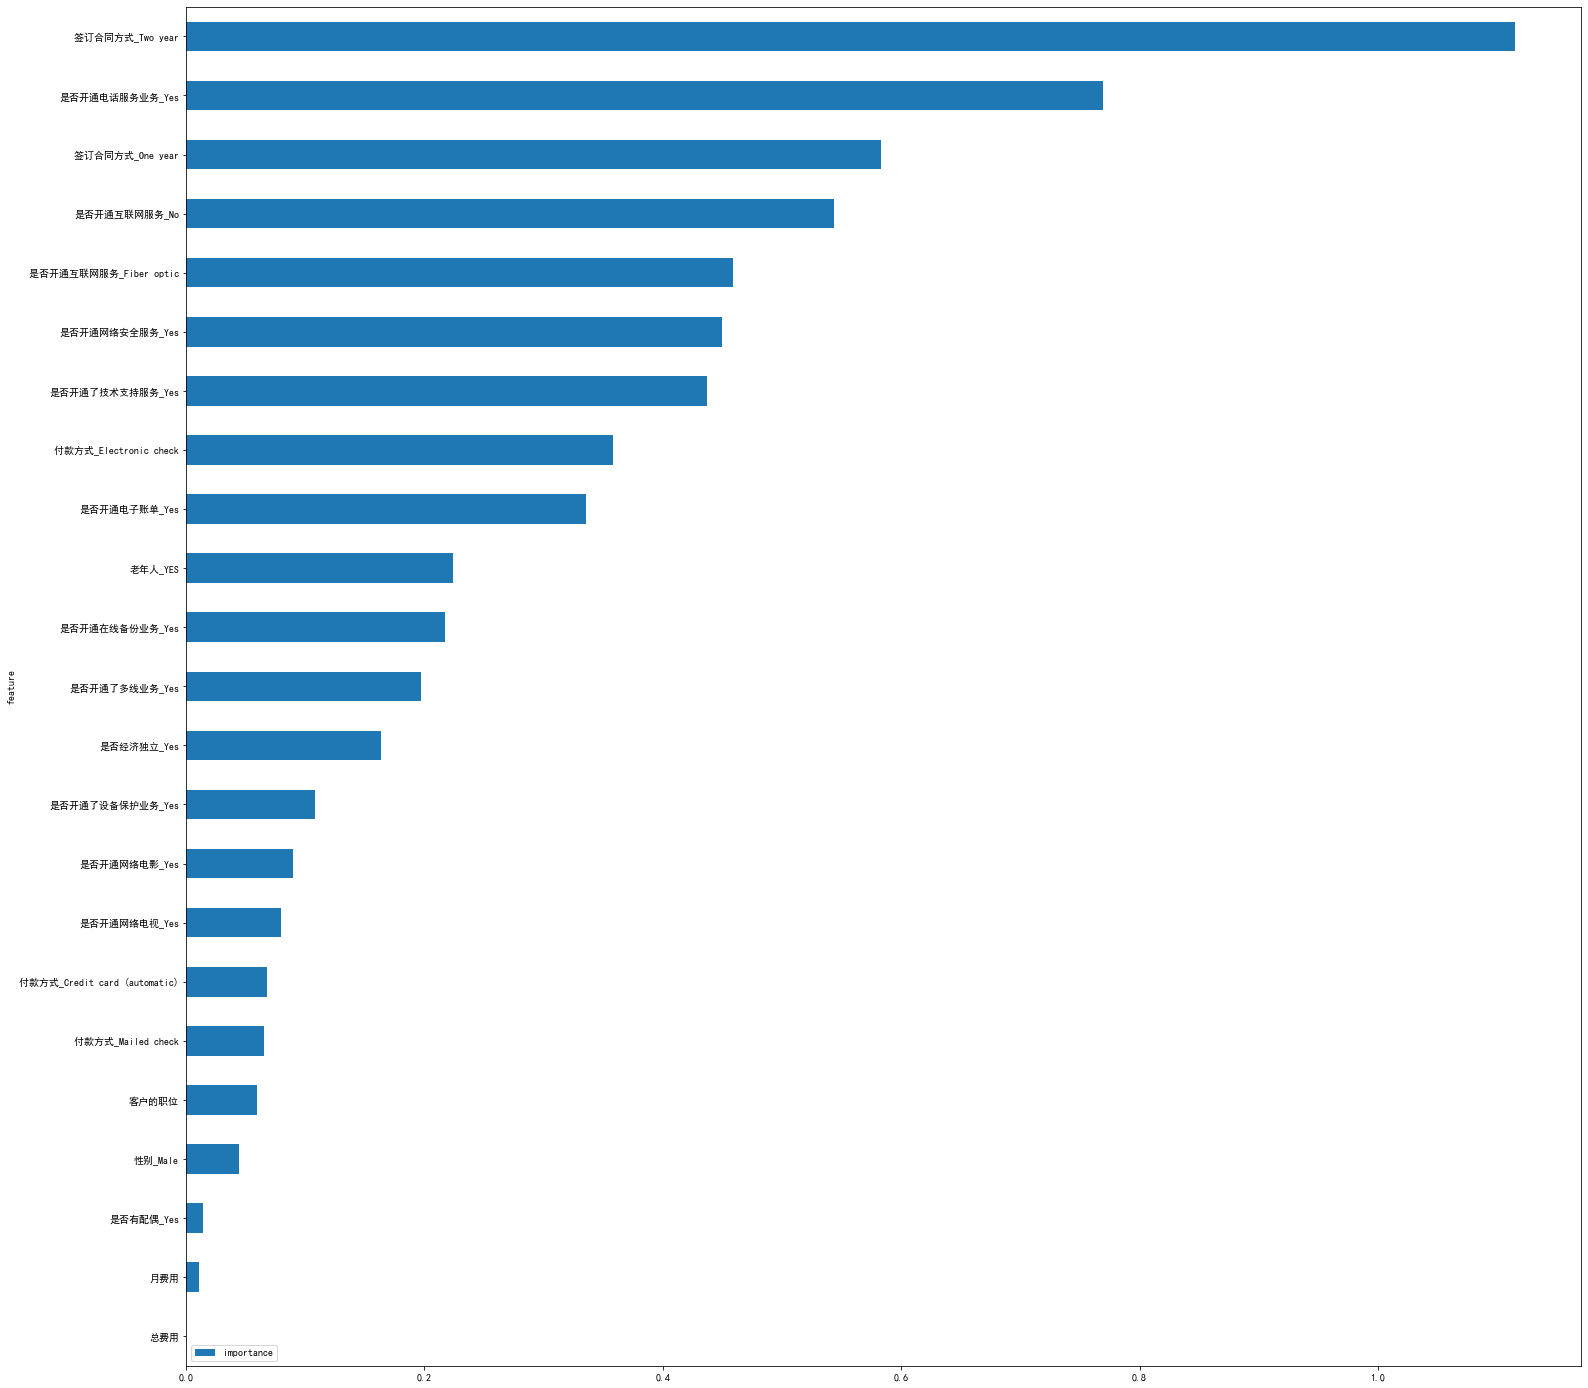

In [135]:
coef = list(map(lambda x : abs(x),coef))

features = pd.DataFrame()
features['feature'] = data.columns
features['importance'] = coef
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

In [136]:
#根据系数权重选择特征，并将样本分成训练集和测试集。
x_embedded = SelectFromModel(lr,threshold='mean').fit_transform(data,target)
x_embedded.shape

(7032, 9)

In [137]:
cross_val_score(lr,x_embedded,target,cv=10).mean()

0.7841286935859305

In [138]:
#模型虽然效果降低2%，但特征少了14个，划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_embedded,target,train_size=0.3,random_state=420)

# 评估模型

In [139]:
lr = LR(solver="liblinear",C=0.09,random_state=420)
lr.fit(X_train,Y_train)

LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=420, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix#混淆矩阵
from sklearn.metrics import accuracy_score#所有分类正确的百分比
from sklearn.metrics import classification_report#精确度/召回率/F1值
confusion_matrix(Y_train,y_pred_train)

array([[1453,  121],
       [ 326,  209]], dtype=int64)

In [142]:
confusion_matrix(Y_test,y_pred_test)

array([[3339,  250],
       [ 835,  499]], dtype=int64)

In [143]:
print('斜率:',lr.coef_)
print('截距:',lr.intercept_)
print('训练集精确率:',accuracy_score(Y_train,y_pred_train))

斜率: [[-0.365128    0.62348037 -0.73088441 -0.43482233 -0.53896886 -1.05907582
  -1.44819851  0.21602621  0.49329136]]
截距: [-0.60989964]
训练集精确率: 0.7880512091038406


In [144]:
print('测试集精确率:',accuracy_score(Y_test,y_pred_test))

测试集精确率: 0.7796059313426772


In [145]:
print('训练集查全率及查准率:')
print(classification_report(Y_train,y_pred_train))

训练集查全率及查准率:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1574
           1       0.63      0.39      0.48       535

    accuracy                           0.79      2109
   macro avg       0.73      0.66      0.67      2109
weighted avg       0.77      0.79      0.77      2109



In [146]:
print('测试集查全率及查准率:')
print(classification_report(Y_test,y_pred_test))

测试集查全率及查准率:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3589
           1       0.67      0.37      0.48      1334

    accuracy                           0.78      4923
   macro avg       0.73      0.65      0.67      4923
weighted avg       0.76      0.78      0.76      4923



In [147]:
from sklearn import metrics
fpr,tpr,auc = metrics.roc_curve(Y_train,y_pred_train)
roc_auc = metrics.auc(fpr,tpr)

In [148]:
roc_auc

0.6568899998812479